In [1]:
import pandas as pd
import seaborn as sns
import random
import math
from sklearn import datasets, linear_model

In [2]:
df = pd.read_csv('SalariesSimple.csv')
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [3]:
df.dropna(axis=0, inplace=True)
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
df.drop(df[df['annual_base_pay']>= 300000].index, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1420 non-null   float64
 1   annual_base_pay         1420 non-null   float64
dtypes: float64(2)
memory usage: 33.3 KB


In [5]:
df.describe()

,total_experience_years,annual_base_pay
count,1420.000000,1420.000000
mean,6.949880,100932.009873
std,5.353317,46193.158326
min,0.500000,16543.000000
25%,3.000000,65962.500000
50%,5.000000,100000.000000
75%,10.000000,130000.000000
max,43.000000,290000.000000


<AxesSubplot:xlabel='total_experience_years', ylabel='annual_base_pay'>

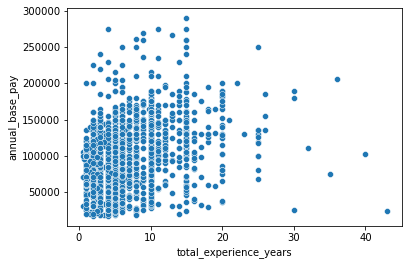

In [6]:
sns.scatterplot(data=df, x='total_experience_years', y="annual_base_pay")

In [7]:
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
print(df['annual_base_pay'].max())

290000.0


In [8]:
def testTrainSplit(data):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    train = data[0: splitLimit]
    test = data[splitLimit + 1: length]
    return train, test

In [9]:
train, test = testTrainSplit(df)

In [13]:
def trainLinearRegression(trainDF):
    count = 0
    slopes = {}
    while count < 100:
        a = random.randint(1, 100) # Slope!
        b = -1 # Coefficient to y --> by = ax + c --> negative because we move to other side
        c = 900 # Y-intercept
        count = count + 1
    sum = sumOfDistances(a, b, c, trainDF)
    slopes[a] = sum
    print(slopes)

In [14]:
def sumOfDistances(a, b, c, trainDF):
    sum = 0
    for row in range(0, len(trainDF.index)):
        gpa = trainDF.iat[row, 0]
        sat = trainDF.iat[row, 1]
        distance = abs((a*gpa) + (b*sat) + c) / math.sqrt((a*a) + (b*b))
        sum = sum + distance
    return sum

In [15]:
trainLinearRegression(train)

{77: 1303956.1634958708}


In [ ]:
regr = linear_model.LinearRegression()